[ 1.39600592 -0.02638507 -2.08923015 ... -0.6057207  -1.44793451
  0.02546795]
[ -3.80490781  -1.06120827 -13.29319924 ...  -1.81584972  -6.92196332
  -1.23481712]


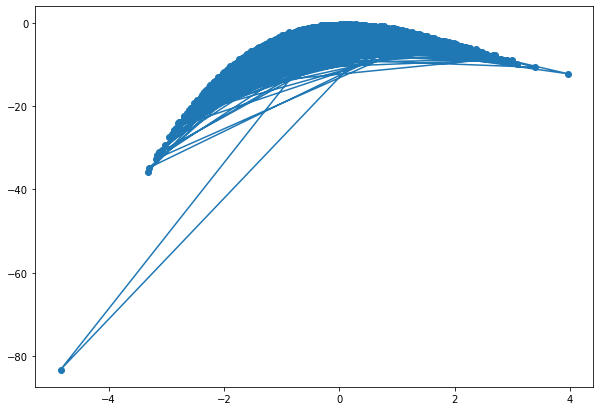

In [160]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import matplotlib.pyplot as plt
# generate normal distributed dataset 
x = np.random.normal(loc=0, scale=1, size=5000)
eps = np.random.normal(loc=0, scale=0.25, size=5000)
w0=-1
w1=+0.5
w2=-2
w3=+0.3
x1 = x.reshape(-1, 1)
y = -1+0.5*x-2*(x**2)+0.3*(x**3)+eps
print(x)
print(y)
plt.figure(figsize=(10,7)) 
plt.plot(x,y)
plt.scatter(x,y)
plt.show()

In [162]:
# OLS implementation 
x = sm.add_constant(x)
result = sm.OLS(y, x).fit()
result.predict([[x[1]]])
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     1075.
Date:                Mon, 23 May 2022   Prob (F-statistic):          9.64e-214
Time:                        06:30:13   Log-Likelihood:                -12737.
No. Observations:                5000   AIC:                         2.548e+04
Df Residuals:                    4998   BIC:                         2.549e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9871      0.044    -68.319      0.0

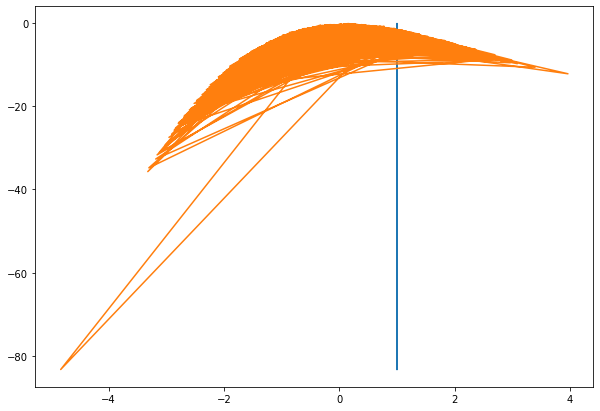

In [164]:
plt.figure(figsize=(10,7)) 
plt.plot(x,y)
plt.show()

In [168]:
# cross validation 10-fold-cv 
ols2 = LinearRegression()
ols_cv_mse = cross_val_score(ols2, x, y, scoring='neg_mean_squared_error', cv=10)
ols_cv_mse.mean()

-9.580496762151297

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import pandas as panda

df_x = panda.DataFrame(x)

df_y = panda.DataFrame(y)

train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=0.25)

lreg = LinearRegression()

lreg.fit(train_x, train_y)

kf = KFold(n_splits=10)

score = cross_val_score(lreg, test_x, test_y, cv=kf)

print(lreg.score(test_x, test_y))
print("\nCross Validation Scores are :\n{}\n".format(score))
print("Average Cross Validation score :\n{}\n".format(score.mean()))

0.14279013064770485

Cross Validation Scores are :
[-0.02421581  0.22718241  0.13556604  0.18676786 -0.63016877  0.08120854
  0.06773316  0.13512241 -0.0925166   0.20474274]

Average Cross Validation score :
0.02914219624344



In [ ]:
plt.figure(figsize=(10,7)) 
plt.plot(test_x,test_y)
plt.show()

[-1.0000103723601317, 0.0, 0.5045356494469025, -2.220446049250313e-16, -2.002079292366617, 0.0, 0.29748899497030845]


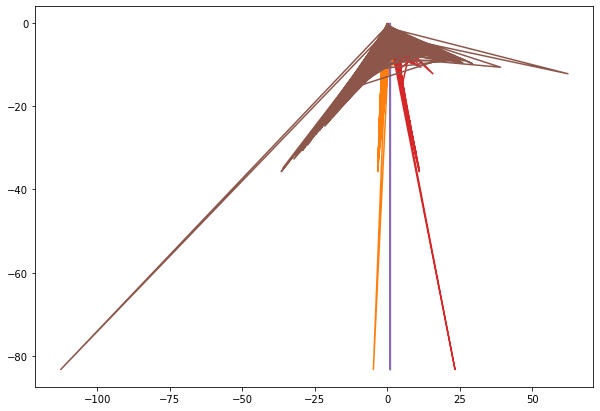

In [171]:
#predicted weight by polynomialregression at degree 3
import numpy as np
from sklearn.linear_model import LinearRegression

# x = np.random.normal(0, 1, (5000, 1))
# eps = np.random.normal(0, np.sqrt(0.25), (5000, 1))

# y = (-1 + 0.5*x - 2*(x**2) + 0.3*x**3 + eps).flatten()

X = np.hstack([x, x**2, x**3])
reg = LinearRegression().fit(X, y)

wpred = [reg.intercept_.tolist()]+ reg.coef_.tolist()
print(wpred)
plt.figure(figsize=(10,7)) 
plt.plot(X,y)
plt.show()